# Vectorisation Bag of Words (BoW) avec CountVectorizer et classification avec RandomForest

La classification se fait sans le label UNKNOWN qui ralentit énormément l'entrainement du modèle à cause du nombre de features qu'il génère une fois vectorisé, ce qui  multiplie les possibilités d'arbre de décision dans le RandomForest.

In [1]:
import os
import pandas as pd

path = "data/text_classification/"

# dataset dict with emtpy attribute train
dataset = pd.DataFrame()

for file in os.listdir(path):
    if file.endswith(".csv"):
        new_data = pd.read_csv(path + file, sep=";")
        dataset = pd.concat([dataset, new_data], ignore_index=True)

dataset

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
0,The departure from riom is imminent.,0,1,1,0
1,Find a way to reach the central square of Ste ...,0,1,0,0
2,yrunyprkzdccpmvhe tgdsmmyxzyxnupakluq i e b ...,0,0,0,1
3,Je veux aller de la place centrale de paimpol ...,1,0,0,0
4,ujiv yn fxotm bvm nkcag o wfxf s dk djed smrv...,0,0,0,1
...,...,...,...,...,...
1231734,Compute a route from Tournai to St-Yrieix-La-P...,0,1,0,0
1231735,oC^~6PU[~2E`Oj&(KwdAOP%)DlI&g.xH9e'_5' vNZ%g*9...,0,0,0,1
1231736,"4NbF5u1FWdoPCzVE^85TMn?;<DilD""q] W-kN+J9~{J3`[...",0,0,0,1
1231737,Si diriga verso ovest.,0,1,1,0


In [2]:
# drop where column unknown is 1
dataset = dataset[dataset['UNKNOWN'] == 0]
dataset.drop(columns=['UNKNOWN'], inplace=True)
dataset

C:\Users\Eliott Clavier\AppData\Local\Temp\ipykernel_13188\4230651982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns=['UNKNOWN'], inplace=True)


,text,CORRECT,NOT_FRENCH,NOT_TRIP
0,The departure from riom is imminent.,0,1,1
1,Find a way to reach the central square of Ste ...,0,1,0
3,Je veux aller de la place centrale de paimpol ...,1,0,0
5,I am planning a trip from Sarlat La Caneda to ...,0,1,0
7,Maria hat Ohrenschmerzen.,0,1,1
...,...,...,...,...
1231726,Y a-t-il un moyen d'atteindre l'hopital de Sai...,1,0,0
1231728,Mon trajet va de l'aéroport de Millau Ã l'aér...,1,0,0
1231730,"En partant de ste-marie-/-mines-maire, je voud...",1,0,0
1231734,Compute a route from Tournai to St-Yrieix-La-P...,0,1,0


In [3]:
labels = [label for label in dataset.columns if label not in ['text']]
id2label = {i:label for i, label in enumerate(labels)}
label2id = {v:k for k,v in id2label.items()}

print(labels)

['CORRECT', 'NOT_FRENCH', 'NOT_TRIP']


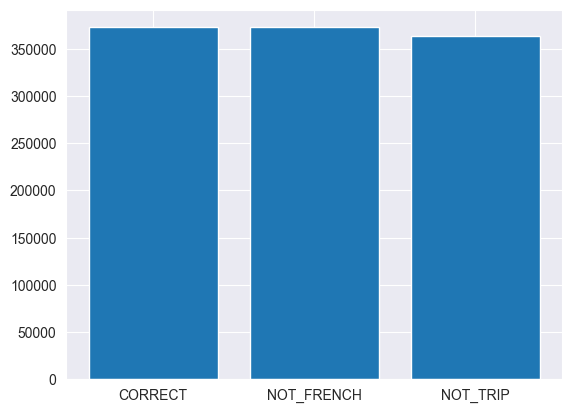

In [4]:
import matplotlib.pyplot as plt

plt.bar(labels, [sum(dataset[label]) for label in labels])
plt.show()

# Split du dataset en train, test et validation

In [5]:
from sklearn.model_selection import train_test_split

# Shuffle train dataset, and pick 50% of it
dataset = dataset.sample(frac=0.5, random_state=0)

X_train = dataset['text']
y_train = dataset[labels]

# Split test dataset into 10% validation and 10% test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(343478,) (42935,) (42935,)
(343478, 3) (42935, 3) (42935, 3)


In [6]:
X_train.values

array(["Don't go near the edge.",
       "What can I do to go from the city of le château-d'almenêches to the city of tassin-la-demi-lune?",
       'Je veux arriver Ã\xa0 SAINT-BONNET-DE-ROCHEFORT.', ...,
       'Tom came home all covered in mud.', 'Dovresti chiamare Tom.',
       'Es ist lange her, seit sie Schluss gemacht hat.'], dtype=object)

# Exemple d'utilisation de CountVectorizer

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<343478x69992 sparse matrix of type '<class 'numpy.int64'>'
	with 3570853 stored elements in Compressed Sparse Row format>

In [8]:
v.get_feature_names_out()[:50]

array(['00', '000', '04', '073', '10', '100', '1000', '100m', '102',
       '104', '1066', '10c', '10th', '11', '110', '111', '112', '12',
       '1200', '123456', '126', '128', '12e', '13', '1300', '14', '1400',
       '1404', '1439', '1473', '1497', '1499', '14th', '15', '150',
       '1500', '150000', '152', '16', '160', '1600', '1603', '1636',
       '168', '17', '1747', '1789', '17th', '18', '1800'], dtype=object)

In [9]:
# Number of identified features
v.get_feature_names_out().shape

(69992,)

In [10]:
# Add threshold to observe only words that appear at least 100 times
v = CountVectorizer(min_df=100)

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<343478x1705 sparse matrix of type '<class 'numpy.int64'>'
	with 3337263 stored elements in Compressed Sparse Row format>

In [11]:
# Number of identified features
v.get_feature_names_out().shape

(1705,)

In [12]:
v.get_feature_names_out()[::50]

array(['11', 'als', 'atteindre', 'bas', 'book', 'cahors', 'chamonix',
       'clisson', 'dans', 'dives', 'ensuès', 'feurs', 'gien', 'hay',
       'indications', 'können', 'limeray', 'lycee', 'maubeuge',
       'mommenheim', 'mullheim', 'noch', 'over', 'pfalz', 'priest',
       'remiremont', 'rumilly', 'seine', 'sta', 'there', 'train',
       'vancelle', 'vit', 'winden', 'évian'], dtype=object)

# Utilisation d'un pipeline SKLearn (vectorizer + classifier RandomForest avec OneVsRestClassifier pour la classification multi-label)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', OneVsRestClassifier(
        RandomForestClassifier( 
            n_estimators=100,
            random_state=42,
            n_jobs=-1,
            verbose=3,
        ))
     )
])

pipeline.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:  1.5min remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:   38.2s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   39.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:  1.7min remaining:    5.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier',
                 OneVsRestClassifier(estimator=RandomForestClassifier(n_jobs=-1,
                                                                      random_state=42,
                                                                      verbose=3)))])

# Evaluation du modèle, métriques

In [14]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred, target_names=labels))

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  95 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.


              precision    recall  f1-score   support

     CORRECT       1.00      1.00      1.00     18624
  NOT_FRENCH       1.00      1.00      1.00     18645
    NOT_TRIP       1.00      1.00      1.00     18340

   micro avg       1.00      1.00      1.00     55609
   macro avg       1.00      1.00      1.00     55609
weighted avg       1.00      1.00      1.00     55609
 samples avg       1.00      1.00      1.00     55609


[Parallel(n_jobs=20)]: Done  95 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  95 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Developpement\environments\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

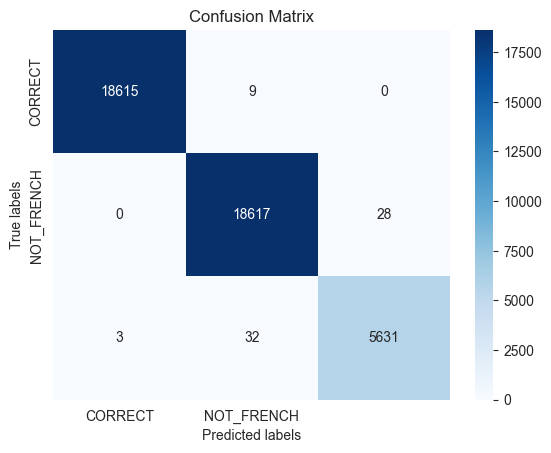

In [16]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels[:-1], yticklabels=labels[:-1])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

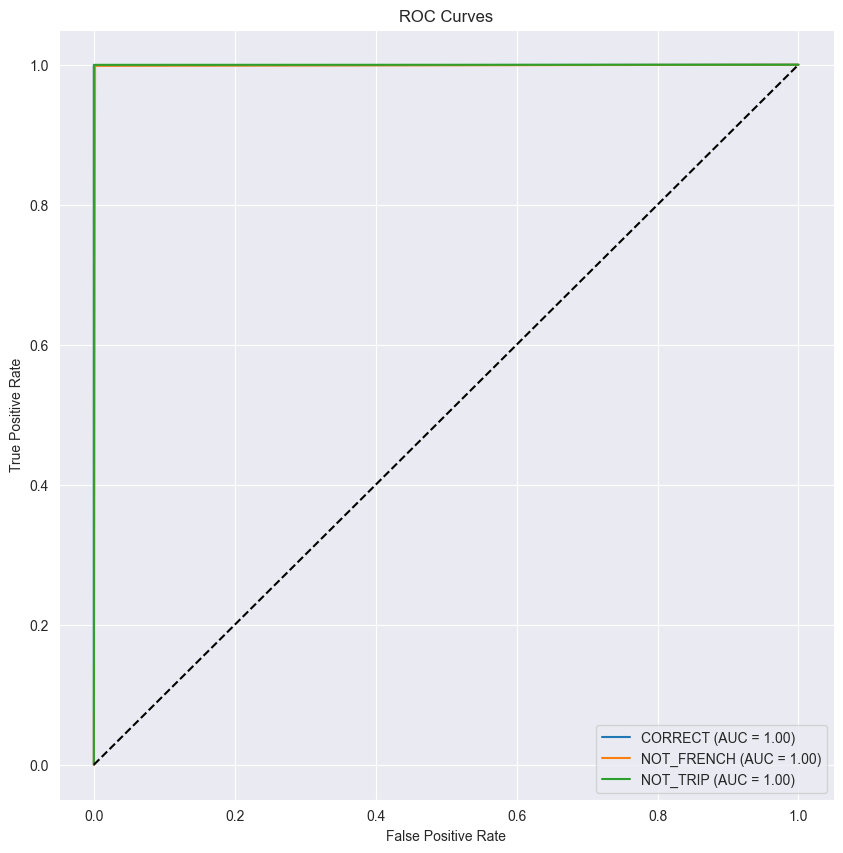

In [17]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test.values[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(10, 10))

for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [18]:
texts = [
    "Je veux aller au cinéma",
    "Je veux aller du cinéma au restaurant",
    "I'd like to go from the cinema to the restaurant",
    "I'd like to Paris from Nanterre",
    "zaeazea eaz e:az e,az e\"zahoiplù;!:gf",
    "J'aimerais me rendre de Nanterre à Paris",
    "Je veux aller de Le Havre à Port-Boulet",
    "Nantes à Toulouse",
    "Dirige moi vers Lyon depuis Saint-Étienne.",
    "Trouve moi un itinéraire pour aller chez Emma de Paris à Marseille",
]

predicted_labels = pipeline.predict(texts)
predicted_proba = pipeline.predict_proba(texts)

# Displaying the predicted labels and probability scores for new texts
for text, p_labels, prob in zip(texts, predicted_labels, predicted_proba):
    print("*", text)
    for i, score in enumerate(prob):
        print(' -', id2label[i], '=>', f"{round(score * 100, 1)}%")
    print()

* Je veux aller au cinéma
 - CORRECT => 40.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 59.0%

* Je veux aller du cinéma au restaurant
 - CORRECT => 38.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 52.0%

* I'd like to go from the cinema to the restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 17.0%

* I'd like to Paris from Nanterre
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 67.0%

* zaeazea eaz e:az e,az e"zahoiplù;!:gf
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 100.0%

* J'aimerais me rendre de Nanterre à Paris
 - CORRECT => 96.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 1.0%

* Je veux aller de Le Havre à Port-Boulet
 - CORRECT => 85.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 17.0%

* Nantes à Toulouse
 - CORRECT => 36.0%
 - NOT_FRENCH => 54.0%
 - NOT_TRIP => 53.0%

* Dirige moi vers Lyon depuis Saint-Étienne.
 - CORRECT => 91.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 10.0%

* Trouve moi un itinéraire pour aller chez Emma de Paris à Marseille
 - CORRECT

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  95 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  95 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  95 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  95 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 co